In [0]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt 

# Generate the data

In [0]:
x = np.arange(1,11)
noise = np.random.uniform(-1,1,len(x))*0.5
y = 3 +  5*x +  noise

# Performing Linear Regression by using 4 major packages
We will perform the linear regression using the following packages:

- **Scipy**
- **Numpy**
- **StatsModels**
- **Sci-kit Learn**

# 1. Scipy

In [0]:
slope, intercept, r_value, _,_ = stats.linregress(x,y)
  
print("slope = {0:5.3f}".format(slope))
print("intercept = {0:5.3f}".format(intercept ))
print("r-squared={0:5.3f}".format( r_value**2))

slope = 4.989
intercept = 3.038
r-squared=1.000


# 2. Numpy
### We need to add a column of ones

In [0]:
A = np.vstack([x, np.ones(len(x))]).T
model = np.linalg.lstsq(A, y,rcond=None)
slope ,intercept  = model[0]
print("slope  = {0:4.3f}, intercept = {1:4.3f}".format(slope ,intercept ))

slope  = 4.989, intercept = 3.038


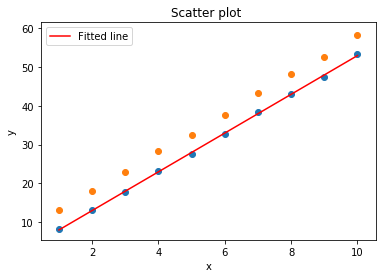

In [0]:
# Plot
plt.scatter(x, y)
plt.scatter(x, y+5)
plt.title('Scatter plot ')
plt.xlabel('x')
plt.ylabel('y')
y_pred = slope*x + intercept
 
plt.plot(x, y_pred, 'r', label='Fitted line')
plt.legend()
plt.show()

# 3. Statsmodels
### Need to add a column of ones

In [0]:
 
X = sm.add_constant(x)
# beta = [3,  5]
# y = np.dot(X, beta) + noise

# Fit regression model
model  = sm.OLS(y, X).fit()

# Inspect the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           1.05e-14
Time:                        03:55:14   Log-Likelihood:                -2.2035
No. Observations:                  10   AIC:                             8.407
Df Residuals:                       8   BIC:                             9.012
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0379      0.230     13.187      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# 4. Scikit-learn

In [0]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
print("These are the input points:")
print(*X)

coefs= np.array([1 ,2])
intercept = 3 
# y = 1 * x_0 + 2 * x_1 + 3 
y = np.dot(X,  coefs) + intercept
print("This is the vector y")
print(*y)
reg = LinearRegression().fit(X, y)
print("Coefficients are: {0:4.1f},{1:4.1f} and the intercept = {2:4.1f}".format(reg.coef_[0],reg.coef_[1] ,reg.intercept_ ))
print(*coefs, sep = ", ")
rsqr = reg.score(X, y)
print("R-sqr is  {0:4.2f}".format(rsqr)) 

print("New input data for prediction:")
pt = [[3,5],[7,9]]
print(*pt)
preds = reg.predict(np.array(pt))
print("prediction for the new input data" ) 
print(*preds)

These are the input points:
[1 1] [1 2] [2 2] [2 3]
This is the vector y
6 8 9 11
Coefficients are:  1.0, 2.0 and the intercept =  3.0
1, 2
R-sqr is  1.00
New input data for prediction:
[3, 5] [7, 9]
prediction for the new input data
15.999999999999998 27.999999999999993
